# Import necessary libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0

--2021-07-06 17:40:16--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-07-06 17:40:16--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc490b492517682bc2bad53ec742.dl.dropboxusercontent.com/cd/0/inline/BRyuoQQcX7luGIsvZZzZpP-3-8vsNIWYfPZBIG_cdGKxXhvBKNzJL-jQ5cC40Gw7J6sLPT7quTHlt4CPfSFadk5aGIjQlsku_5OWiai2e_PVOcyK2y9ZS2MLQo2V3a40cZK8o4-8rwZScIJFSsxe-1x5/file# [following]
--2021-07-06 17:40:17--  https://uc490b492517682bc2bad53ec742.dl.dropboxusercontent.com/cd/0/inline/BRyuoQQcX7luGIsvZZzZpP-3-8vsNIWYfPZBIG_cdGKxXhvBKNzJL-jQ5cC40Gw7J6s

In [ ]:
!unzip /content/BrainTumorData.zip?dl=0

Archive:  /content/BrainTumorData.zip?dl=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import shutil      # Helps move files around different folders
import glob        # Helps retrieve pathnames matching a specified pattern

In [ ]:
# Count image count in respective classes (0 - Brain Tumor, 1 - Healthy)

ROOT_DIR = '/content/BrainTumorData/Brain Tumor Data Set'     # Root folder
number_of_images = {}                                         # Directory to hold key- folder name and value - image count in that folder

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))    # os.listdir() returns the directories present inside given path as a list

number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

# Splitting the dataset 
70% Training data, 15% validation data and 15% test data

In [ ]:
# Create a train folder

# If folder doesn't already exist, then create and add images
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    # Choosing 70% of the existing images of each class randomly, -5 so we don't want to lose too many images
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                size = (math.floor(0.7 * number_of_images[dir]) - 5),
                                replace = False):
      origin = os.path.join(ROOT_DIR, dir, img)
      destination = os.path.join("./train/",dir)
      shutil.copy(origin, destination)
      os.remove(origin)
else:
  print("Training folder already exists!")

In [ ]:
print(len(os.listdir("/content/train/Brain Tumor/")))       # 70% images found in training set

1754


In [ ]:
# Function to create the training, validation and test folders

def dataFolder(path, split):
  # If folder doesn't already exist, then create and add images
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      # Choosing 70% of the existing images of each class randomly, -5 so we don't want to lose too many images
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size = (math.floor(split * number_of_images[dir]) - 5),
                                  replace = False):
        origin = os.path.join(ROOT_DIR, dir, img)
        destination = os.path.join("./"+path,dir)
        shutil.copy(origin, destination)    # Transfer the file
        os.remove(origin)
  else:
    print(f"{path} folder already exists!")

In [ ]:
dataFolder("train",0.7)

train folder already exists!


In [ ]:
dataFolder("val", 0.15) # Validation folder

In [ ]:
dataFolder("test", 0.15) # Test folder

# Build the model

## Import necessary libraries

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
# Typical CNN Model

model = Sequential()

# Add layers to model
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))  # First layer
model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))   # Drop out 25% of data to prevent overfitting

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

Prepare our data using ImageDataGenerator

In [ ]:
def preprocessingImages(path):
  """
  I/P - Path, O/P - Pre-processed images
  """
  # Data augmentation to improve performance and ability to generalize by creating variations 
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

def preprocessingImagesForValidation(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages(path)

Found 3209 images belonging to 2 classes.


In [ ]:
path = "/content/test"
test_data = preprocessingImagesForValidation(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImagesForValidation(path)

Found 679 images belonging to 2 classes.


In [ ]:
# Early stopping to stop training once model performance does not increase anymore and Model checkpoint to save model after some interval

from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1, mode='auto')

mc = ModelCheckpoint(monitor='val_accuracy', filepath="./bestmodel.h5", verbose=1, mode='auto', save_best_only=True)

cb = [es, mc]

# Train model

In [ ]:
history = model.fit_generator(generator=train_data, 
                              steps_per_epoch=8, 
                              epochs=30, 
                              verbose=1, 
                              validation_data=val_data, 
                              validation_steps=16, 
                              callbacks=cb)

Epoch 1/30
8/8 [==============================] - 76s 8s/step - loss: 0.9294 - accuracy: 0.4450 - val_loss: 0.6826 - val_accuracy: 0.6094

Epoch 00001: val_accuracy improved from -inf to 0.60938, saving model to ./bestmodel.h5
Epoch 2/30
8/8 [==============================] - 60s 8s/step - loss: 0.6794 - accuracy: 0.5858 - val_loss: 0.6669 - val_accuracy: 0.5215

Epoch 00002: val_accuracy did not improve from 0.60938
Epoch 3/30
8/8 [==============================] - 59s 8s/step - loss: 0.6590 - accuracy: 0.5758 - val_loss: 0.6303 - val_accuracy: 0.6895

Epoch 00003: val_accuracy improved from 0.60938 to 0.68945, saving model to ./bestmodel.h5
Epoch 4/30
8/8 [==============================] - 58s 8s/step - loss: 0.6216 - accuracy: 0.6811 - val_loss: 0.6179 - val_accuracy: 0.6992

Epoch 00004: val_accuracy improved from 0.68945 to 0.69922, saving model to ./bestmodel.h5
Epoch 5/30
8/8 [==============================] - 60s 8s/step - loss: 0.6195 - accuracy: 0.6860 - val_loss: 0.6136 - va

# Model Graphical Interpretation

In [ ]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

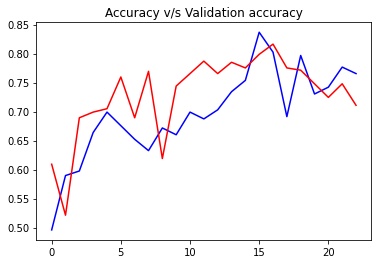

In [ ]:
plt.plot(h['accuracy'], c='blue')
plt.plot(h['val_accuracy'], c='red')
plt.title('Accuracy v/s Validation accuracy')
plt.show()

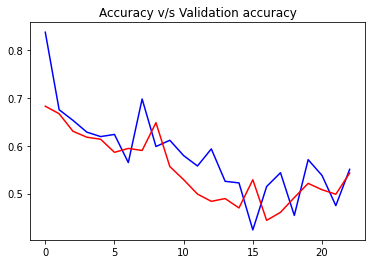

In [ ]:
plt.plot(h['loss'], c='blue')
plt.plot(h['val_loss'], c='red')
plt.title('Accuracy v/s Validation accuracy')
plt.show()

In [ ]:
# Model accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")     # Load the best model

# ACCURACY OBTAINED BY TYPICAL CNN

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy obtained by our model is {acc*100}%")

The accuracy obtained by our model is 82.32694864273071%


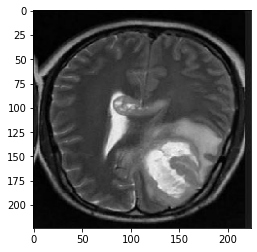


This MRI has a tumor


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# Load a random image to test our model prediction upon
path="/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1063).jpg" # Tumorous
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")

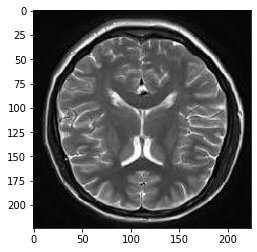


No tumor


In [ ]:
path="/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (1401).jpg"   # Healthy
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")

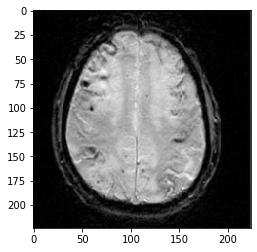


No tumor


In [ ]:
path="/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (209).jpg"   # Healthy
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]   # Returns class index

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")

# Using Transfer Learning to improve model accuracy

## Import necessary libraries

In [ ]:
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
def preprocessingImagesTL(path):
  """
  I/P - Path, O/P - Pre-processed images
  """
  # Making use of preprocess input instead of rescaling this time
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

def preprocessingImagesForValidationTL(path):
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image  

In [ ]:
path = "/content/train"
train_data = preprocessingImagesTL(path)

Found 3209 images belonging to 2 classes.


In [ ]:
path = "/content/test"
test_data = preprocessingImagesForValidationTL(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImagesForValidationTL(path)

Found 679 images belonging to 2 classes.


## Model Training

In [ ]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
for layers in base_model.layers:
  layers.trainable = False        # Do not re-train the model

In [ ]:
base_model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7faca7b41a10>>

In [ ]:
# Clubbing our model with the pretrained model

X = Flatten()(base_model.output)
x = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, x)     # Final model

In [ ]:
model.summary()       # We view that we've replaced the final layer of MobileNet with our required Flatten and Dense layers

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
# Callback
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only=True)

cb = [mc,es]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=8,
                           epochs=30, 
                           validation_data=val_data,
                           validation_steps=16,
                           callbacks=cb)

Epoch 1/30
8/8 [==============================] - 55s 927ms/step - loss: 4.5425 - accuracy: 0.4900 - val_loss: 0.9439 - val_accuracy: 0.8320

Epoch 00001: val_accuracy improved from -inf to 0.83203, saving model to bestmodel.h5
Epoch 2/30
8/8 [==============================] - 5s 682ms/step - loss: 1.5464 - accuracy: 0.7942 - val_loss: 1.1415 - val_accuracy: 0.8008

Epoch 00002: val_accuracy did not improve from 0.83203
Epoch 3/30
8/8 [==============================] - 5s 692ms/step - loss: 1.0383 - accuracy: 0.8200 - val_loss: 0.8880 - val_accuracy: 0.8438

Epoch 00003: val_accuracy improved from 0.83203 to 0.84375, saving model to bestmodel.h5
Epoch 4/30
8/8 [==============================] - 5s 686ms/step - loss: 0.6544 - accuracy: 0.8754 - val_loss: 0.3457 - val_accuracy: 0.9316

Epoch 00004: val_accuracy improved from 0.84375 to 0.93164, saving model to bestmodel.h5
Epoch 5/30
8/8 [==============================] - 5s 660ms/step - loss: 0.2275 - accuracy: 0.9468 - val_loss: 0.2749

# ACCURACY OBTAINED AFTER TRANSFER LEARNING USING MOBILE NET ARCHITECTURE

In [ ]:
# Load the best model
model = load_model("/content/bestmodel.h5")

acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy obtained by our model on transfer learning is {acc*100}%")

The accuracy obtained by our model on transfer learning is 94.10898089408875%


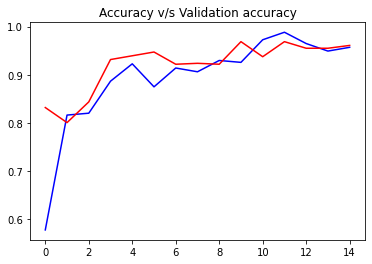

In [ ]:
h = hist.history

plt.plot(h['accuracy'], c='blue')
plt.plot(h['val_accuracy'], c='red')
plt.title('Accuracy v/s Validation accuracy')
plt.show()

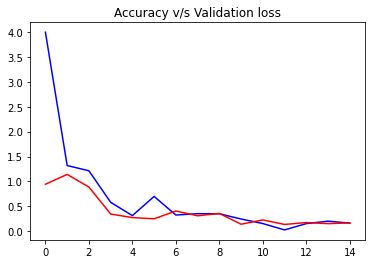

In [ ]:
plt.plot(h['loss'], c='blue')
plt.plot(h['val_loss'], c='red')
plt.title('Accuracy v/s Validation loss')
plt.show()


This MRI has a tumor


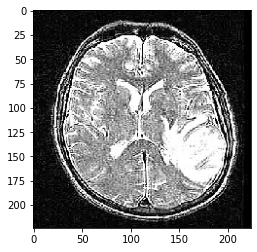

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# Load a random image to test our model prediction upon
path="/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1538).jpg" # Tumorous
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr))

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")

plt.imshow(input_arr[0])
plt.show()